# Implement linear regression, logistic regression, SVM with hinge loss function and support vector regression.

In [146]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from sklearn import datasets
from tensorflow.keras import layers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K


## 1. Linear Regression

In [149]:
# Generating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)
  
# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)
  
n = len(x) # Number of data points

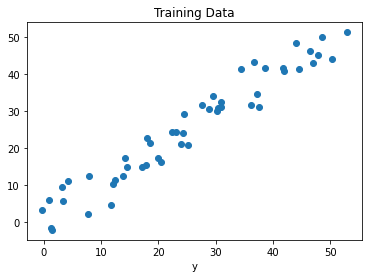

In [150]:
plt.scatter(x, y)
plt.xlabel('x')
plt.xlabel('y')
plt.title("Training Data")
plt.show()

In [151]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [152]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [153]:
learning_rate = 0.01
training_epochs = 1000

In [156]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
  
# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
  
# Global Variables Initializer
init = tf.global_variables_initializer()

In [155]:
# Starting the Tensorflow Session
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Iterating through all the epochs
    for epoch in range(training_epochs):
          
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
          
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
      
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 7.0549927 W = 0.9647979 b = 0.1217615
Epoch 100 : cost = 6.96518 W = 0.9609931 b = 0.31387055
Epoch 150 : cost = 6.8953166 W = 0.9575833 b = 0.4860331
Epoch 200 : cost = 6.8412366 W = 0.9545276 b = 0.6403189
Epoch 250 : cost = 6.7996264 W = 0.95178914 b = 0.7785847
Epoch 300 : cost = 6.7678385 W = 0.949335 b = 0.90249634
Epoch 350 : cost = 6.743772 W = 0.94713557 b = 1.0135417
Epoch 400 : cost = 6.72575 W = 0.94516474 b = 1.1130553
Epoch 450 : cost = 6.712453 W = 0.9433983 b = 1.2022398
Epoch 500 : cost = 6.702825 W = 0.94181544 b = 1.2821608
Epoch 550 : cost = 6.6960325 W = 0.9403969 b = 1.3537848
Epoch 600 : cost = 6.691424 W = 0.93912566 b = 1.417971
Epoch 650 : cost = 6.688481 W = 0.9379863 b = 1.475494
Epoch 700 : cost = 6.6867948 W = 0.9369653 b = 1.5270482
Epoch 750 : cost = 6.6860485 W = 0.9360503 b = 1.5732478
Epoch 800 : cost = 6.685995 W = 0.93523026 b = 1.6146497
Epoch 850 : cost = 6.6864395 W = 0.9344954 b = 1.651754
Epoch 900 : cost = 6.6872344 W = 0.933

In [157]:
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 6.689445 Weight = 0.93271804 bias = 1.7414923 



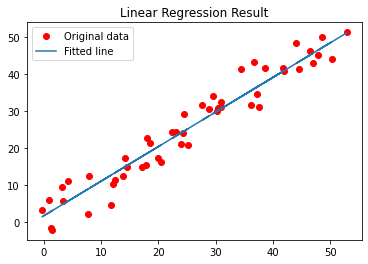

In [158]:
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

## 2. Logistic Regression

In [159]:
data = pd.read_csv('archive/Iris.csv')
print("Data Shape:", data.shape)
  
print(data.head())
data = data[:100]

Data Shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [160]:
data.Species = data.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])


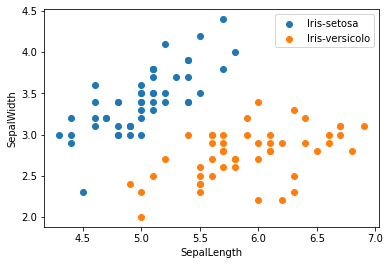

In [161]:
plt.scatter(data[:50].SepalLengthCm, data[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(data[51:].SepalLengthCm, data[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [163]:
X = data.drop(labels=['Id', 'Species'], axis=1).values
y = data.Species.values
X.shape

(100, 4)

In [164]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [165]:
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [166]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [167]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [168]:
A = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [169]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [170]:
mod = tf.matmul(data, A) + b
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500
opt = tf.train.GradientDescentOptimizer(learning_rate)
goal = opt.minimize(loss)
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework
loss_trace = []
train_acc = []
test_acc = []

In [171]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.594314 train_acc: 0.537500 test_acc: 0.350000
epoch:  600 loss: 0.474795 train_acc: 0.575000 test_acc: 0.450000
epoch:  900 loss: 0.408028 train_acc: 0.937500 test_acc: 1.000000
epoch: 1200 loss: 0.315525 train_acc: 1.000000 test_acc: 1.000000
epoch: 1500 loss: 0.262832 train_acc: 1.000000 test_acc: 1.000000


## 3. SVM with hinge loss

In [172]:
X_sub=X[:,:2]
y=np.where(y==1, y, -1)

In [173]:
model = Sequential()
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2()))
def hinge_loss(y_true, y_pred):    
    return tf.maximum(0., 1- y_true*y_pred)
model.compile(loss=hinge_loss,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_sub, y, epochs=5000, verbose=False)
model.evaluate(X_sub, y)


100/100 [==============================] - 0s 3ms/sample - loss: 0.1764 - acc: 0.4500


[0.17641823291778563, 0.45]

## 4. SVR with epsilon insensitive loss

In [174]:
def L1_loss(layer, y_true, y_pred):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    y_true_0 = tf.cast(y_true, tf.float32)
    dif = abs(y_pred-y_true_0)
    ess_loss = K.sum(K.maximum(0.0,dif-0.1),axis=-1)## how to choose an optimal epsilon
    regularization_loss = 0.5*(tf.reduce_sum(tf.multiply(weights_tf,weights_tf)))
    return regularization_loss + 0.2*ess_loss ## how to choose an optimal penalization parameter

In [175]:
model = Sequential()
model.add(Dense(1, activation='linear', name='svrl'))
def hinge_loss(y_true, y_pred):    
    return tf.maximum(0., 1- y_true*y_pred)
model.compile(loss=lambda y_true,y_pred:L1_loss(model.get_layer('svrl'),y_true,y_pred),
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_sub, y, epochs=5000, verbose=False)
model.evaluate(X_sub, y)


100/100 [==============================] - 0s 3ms/sample - loss: 0.1737 - acc: 0.0000e+00


[0.17371975064277648, 0.0]

## 5. XOR 

In [176]:
# input X vector
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
# output Y vector
Y = [[0], [1], [1], [0]]
# Placeholders for input and output
x = tf.placeholder(tf.float32, shape=[4,2])
y = tf.placeholder(tf.float32, shape=[4,1])
# W matrix
W1 = tf.Variable([[1.0, 0.0], [1.0, 0.0]], shape=[2,2])
W2 = tf.Variable([[0.0], [1.0]], shape=[2,1])

# Biases
B1 = tf.Variable([0.0, 0.0], shape=[2])
B2 = tf.Variable([0.0], shape=1)
# Hidden layer and outout layer
output =tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(x, W1) + B1), W2) + B2)
 
# error estimation
e = tf.reduce_mean(tf.squared_difference(y, output))
train = tf.train.GradientDescentOptimizer(0.1).minimize(e)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range (100001):
    error = sess.run(train, feed_dict={x: X, y: Y})
    if i % 10000 == 0:
        print('\nEpoch: ' + str(i))
        print('\nError: ' + str(sess.run(e, feed_dict={x: X, y: Y})))
        for el in sess.run(output, feed_dict={x: X, y: Y}):
            print('    ',el)
sess.close()
 
print ("Complete")


Epoch: 0

Error: 0.26442587
     [0.62025726]
     [0.6200183]
     [0.6200183]
     [0.6198486]

Epoch: 10000

Error: 0.07002342
     [0.2077933]
     [0.7534745]
     [0.7534745]
     [0.33965564]

Epoch: 20000

Error: 0.0061955405
     [0.07956657]
     [0.9271754]
     [0.9271754]
     [0.08856907]

Epoch: 30000

Error: 0.0028774943
     [0.05516872]
     [0.9504955]
     [0.9504955]
     [0.05970758]

Epoch: 40000

Error: 0.0018379441
     [0.04440123]
     [0.9604852]
     [0.9604852]
     [0.04751286]

Epoch: 50000

Error: 0.0013404149
     [0.03807229]
     [0.96628344]
     [0.96628344]
     [0.04047897]

Epoch: 60000

Error: 0.001051139
     [0.03380311]
     [0.970159]
     [0.970159]
     [0.03579015]

Epoch: 70000

Error: 0.00086272974
     [0.03068176]
     [0.9729731]
     [0.9729731]
     [0.03238276]

Epoch: 80000

Error: 0.00073076086
     [0.02828008]
     [0.9751314]
     [0.9751314]
     [0.02977222]

Epoch: 90000

Error: 0.0006333374
     [0.02635822]
     [0.976

## 6. NN

In [177]:
from scipy.stats import chi2


In [178]:
mu, sigma = 0, 1
X= np.random.normal(mu, sigma, size=(1000, 10))
c= chi2.ppf(0.5, df=10)
criteia = lambda x: sum([x[i]**2 for i in range(0, 10)])
Y = np.ones(shape=1000)
for i in range(0, 1000):
    Y[i] = 1 if criteia(X[i]) > c else 0
    
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]
model = Sequential()
model.add(Dense(units=10,activation='relu',input_shape=(10,)))
model.add(Dense(units=8,activation='linear'))
model.add(Dense(units=12,activation='linear'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(train_X,train_y,epochs=150, batch_size=32, verbose=0)
loss, acc = model.evaluate(test_X,test_y, verbose=0)
print('Test Accuracy: %.3f'% acc)
#predict
row=np.random.normal(mu, sigma, size=(1, 10))
yhat= model.predict([row])
print('Predicted: %.3f' % yhat)

Test Accuracy: 0.740
Predicted: 0.886


In this case, the test accuracy is 0.8. A prediction is made for a single row of random data, which predicted a probability of 0.9 that the data belongs to class 1. 